## Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

# Submitted by Michael I 5936

In [1]:
# stundent details example: John S. 9812
#                       student details 1: Michael I 5936
# (if exists)           student details 2: 
# (if exists)           student details 3: 
# (if exists&premitted) student details 4: 

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name:ChatGPT
Goal:helping to plot correlations based on heat map and Scatter plot for measure of spreads
Propmpt1: https://chatgpt.com/share/682372cd-19bc-800f-b4a6-598de2e4a285
    
Propmpt2:
    
Propmpt3: 


AI agent name 2:Grok
Goal:finding Cross Validation grid search and k-fold syntax using my model , understanding random forest model
Propmpt1:   https://grok.com/chat/c1b0c8de-b8bc-425d-9904-46dde6cee4b5  how to create Cross validation grid search and
            split data to k-fold validation groups
    
Propmpt2:   https://grok.com/share/bGVnYWN5_ca8ad480-0e14-4ff5-b6ba-ee89d7150dd1 how to create Confusion matrix for my test                 predictions 
    
Propmpt3: Random forest and its hyper parameters explanation https://grok.com/share/bGVnYWN5_3c2d0f55-1757-43fb-b277-cadfa065e684
Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
Wine Dataset , Wine classification into 3 different classes 
Model methods: K-NN , Random-Forest
Scaling Methods: Z-score, 
Feature Engineering: PCA+Normalization for KNN
Hyper Parameters Search using grid search and k-fold combinations splitting train data
and choosing best method of distance metric, PCA components, K parameters for K-NN.
and for Random forest Hyper-Parameters we are going to choose : N-estimators (Number of decision trees in the forest),
max depth (the maximum depth of each decision tree) and max features(number of Splits in each node to consider according to sqrt(|Num Of Features|) or log2(|Num Of Features|).

using f1 cross validation method.
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import string
import re
import math
import statistics
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
def load_dataset(X_file,Y_file, category_col_name):
    X_train = pd.read_csv(X_file)
    X_test = pd.read_csv(Y_file)
    Y_train = X_train[category_col_name]
    X_train = X_train.drop(columns=[category_col_name])
    Y_test = X_test[category_col_name]
    X_test = X_test.drop(columns=[category_col_name])
    return X_train, Y_train, X_test, Y_test

In [4]:
X_file = 'wine_train.csv'
Y_file = 'wine_test.csv'
category_col_name = 'target'
x_train, y_train , x_test, y_test = load_dataset(X_file,Y_file,category_col_name)
x_train.head()
x_test.head()
y_train.head()
x_train.describe(include='all')
x_train.dtypes

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0


0    1
1    2
2    1
3    1
4    2
Name: target, dtype: int64

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000


alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Wine Features')

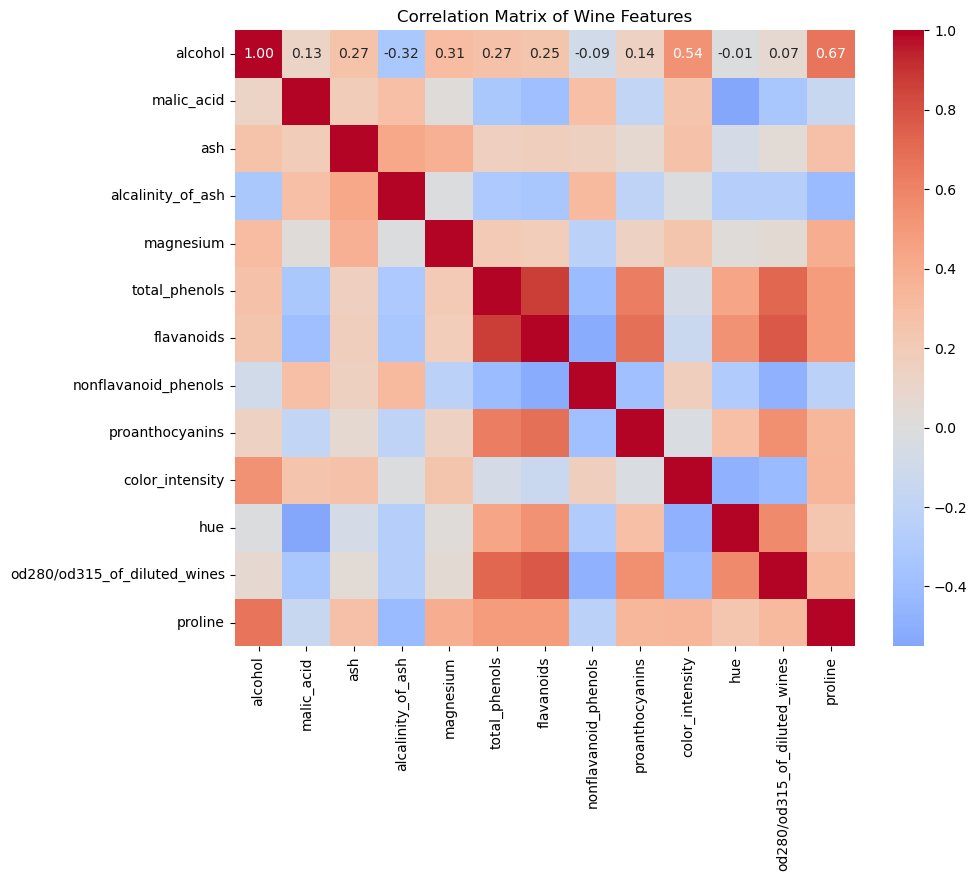

In [5]:
corr_matrix = x_train.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Wine Features')
plt.show()


<Axes: xlabel='flavanoids', ylabel='total_phenols'>

Text(0.5, 1.0, 'Flavanoids vs Total Phenols')

<Axes: xlabel='flavanoids', ylabel='od280/od315_of_diluted_wines'>

Text(0.5, 1.0, 'Flavanoids vs OD280/OD315 of Diluted Wines')

<Axes: xlabel='alcohol', ylabel='proline'>

Text(0.5, 1.0, 'Alcohol vs Proline')

<Axes: xlabel='malic_acid', ylabel='hue'>

Text(0.5, 1.0, 'Malic acid vs Hue')

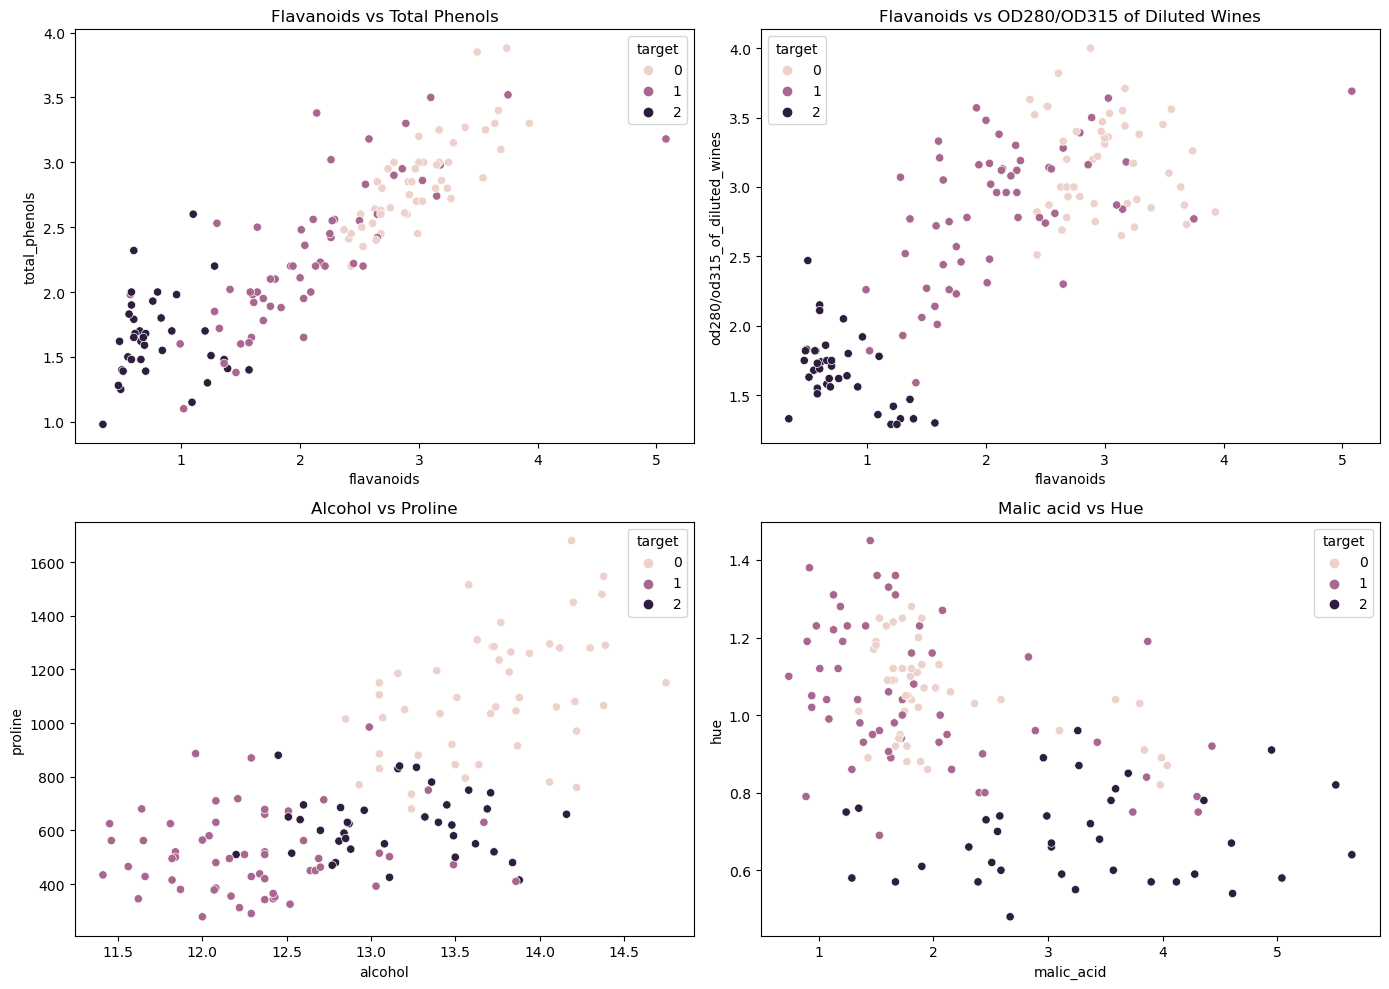

In [6]:

x_train_vis = x_train.copy(deep=True)
x_train_vis['target'] = y_train
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Flavanoids vs Total Phenols
sns.scatterplot(data=x_train_vis, x='flavanoids', y='total_phenols',hue='target', ax=axs[0, 0])
axs[0, 0].set_title('Flavanoids vs Total Phenols')

# 2. Flavanoids vs OD280/OD315_of_diluted_wines
sns.scatterplot(data=x_train_vis, x='flavanoids', y='od280/od315_of_diluted_wines',hue='target', ax=axs[0, 1])
axs[0, 1].set_title('Flavanoids vs OD280/OD315 of Diluted Wines')

# 3. Alcohol vs Proline
sns.scatterplot(data=x_train_vis, x='alcohol', y='proline',hue='target', ax=axs[1, 0])
axs[1, 0].set_title('Alcohol vs Proline')

# 4. Color Intensity vs Hue
sns.scatterplot(data=x_train_vis, x='malic_acid', y='hue',hue='target', ax=axs[1, 1])
axs[1, 1].set_title('Malic acid vs Hue')

plt.tight_layout()
plt.show()

In [7]:
def fit_train(train_set, category_col_name, y_train):
    train_set_Copy = train_set.copy(deep=True)
    mean = train_set.mean()
    std = train_set.std()
    train_set_Copy = (train_set - mean) / std
    return train_set_Copy, mean, std, sorted(np.unique(y_train))

def fit_test(test_set, y_test, train_mean, train_std):
    test_set_Copy = test_set.copy(deep=True)
    test_set_Copy = (test_set - train_mean) / train_std
    return test_set_Copy

In [8]:
X_train_normalized, mean , std , element_lst = fit_train(x_train,category_col_name,y_train)
X_train_normalized.head()
mean

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-1.161182,-0.427823,-0.147195,-0.274149,-1.384391,-1.119657,-0.560619,1.474197,0.144365,-1.174415,0.552912,-0.513692,-0.827288
1,0.737719,0.258163,1.159159,1.514325,0.369514,-1.197847,-1.217138,0.368399,-0.040485,1.620736,-0.995139,-1.168213,0.023774
2,-0.794062,-1.241860,-3.536654,-2.628973,-0.872835,-0.525414,-1.485714,-0.567275,-2.110806,-1.375344,0.416319,-1.140361,-0.701204
3,-1.490325,-0.528435,-1.700697,0.023930,-1.018994,0.287761,-0.421357,0.198277,-0.262305,-1.326228,-0.084521,-0.276950,-1.032173
4,0.206026,1.163664,-0.747412,0.471049,0.150276,-1.276037,-1.505608,0.708645,-0.484125,-0.459999,-1.632572,-1.335324,0.275940


alcohol                          12.997254
malic_acid                        2.297746
ash                               2.361690
alcalinity_of_ash                19.419718
magnesium                        99.943662
total_phenols                     2.315986
flavanoids                        2.063592
nonflavanoid_phenols              0.346690
proanthocyanins                   1.561901
color_intensity                   5.030211
hue                               0.958563
od280/od315_of_diluted_wines      2.638873
proline                         742.457746
dtype: float64

<Figure size 700x500 with 0 Axes>

<Axes: xlabel='pca1', ylabel='pca2'>

Text(0.5, 1.0, 'pca1 vs pca2')

Text(0.5, 0, 'pca1')

Text(0, 0.5, 'pca2')

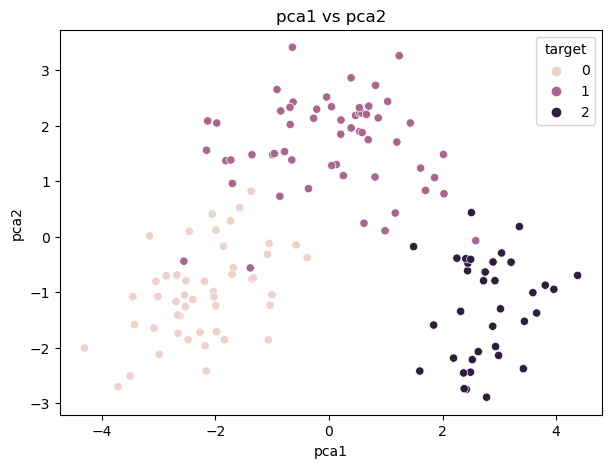

In [9]:
x_train_vis2 = X_train_normalized.copy(deep=True)
pca_vis = PCA(n_components=2)  
x_vis_pca = pca_vis.fit_transform(x_train_vis2)
x_train_vis2 = pd.DataFrame(x_vis_pca, columns=['pca1', 'pca2'])
x_train_vis2['target'] = y_train

    
    
plt.figure(figsize=(7, 5))
sns.scatterplot(data=x_train_vis2, x='pca1', y='pca2', hue='target')
plt.title('pca1 vs pca2')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [10]:
def Calc_Distance(X_train_feature,X_test_feature,Method):
    if Method == 'Euclidean':
        return np.sqrt(np.sum((X_train_feature - X_test_feature) ** 2))
    if Method == 'Chebyshev':
        return np.max(np.abs(X_train_feature - X_test_feature))
    if Method == 'Manhattan':
        return np.sum(np.abs(X_train_feature - X_test_feature))


In [11]:
def load_df_distance(X_train_normalized,X_test_normalized,y_train):
    df_distance = pd.DataFrame({'distance':np.zeros(len(y_train)),'y_train':y_train.values})
    return df_distance , 'distance'

In [12]:
def predict(df_distance,col_name,element_lst,k):
    df_sorted = df_distance.sort_values(by=col_name, ascending=True).head(k)
    # Count occurrences of each class in top k neighbors
    class_counts = pd.Series(0, index=element_lst, dtype=float)

    # Update class_counts with actual counts from top k neighbors
    actual_counts = df_sorted['y_train'].value_counts()
    for cls in actual_counts.index:
        if cls in class_counts.index:
            class_counts[cls] = actual_counts[cls]


    return class_counts.idxmax()

In [13]:
def KNN(X_train_normalized,X_test_normalized,y_train,element_lst,k,distance_method,pca_n):
    pca = PCA(n_components=pca_n)  
    x_train_pca = pca.fit_transform(X_train_normalized)
    x_test_pca = pca.transform(X_test_normalized)
    X_train_normalized = pd.DataFrame(x_train_pca)
    X_test_normalized = pd.DataFrame(x_test_pca)
    df_distance , df_e_col = load_df_distance(X_train_normalized,X_test_normalized,y_train)
    X_Predict = X_test_normalized.copy(deep=True)
    X_Predict['y_predict'] = np.nan
    x_testsize = X_test_normalized.shape[0]
    df_distancesize = df_distance.shape[0]
    for j in range(x_testsize):
        test_instance = X_test_normalized.iloc[j]
        for i in range(df_distancesize):
            train_instance = X_train_normalized.iloc[i]
            df_distance.loc[i,df_e_col] = Calc_Distance(train_instance,test_instance,distance_method)
        X_Predict.loc[j,'y_predict'] = predict(df_distance,df_e_col,element_lst,k)
    return X_Predict

In [14]:
Distance_Hyper_Parameters = {'Euclidean','Chebyshev','Manhattan'}
K_Hyper_Parameters = {3, 5,7, 9}
PCI_Components = {2 , 0.95, 0.9}
Model_Method = {'KNN','Random-Forest'}

RF_n_estimators = [50,100,169]
RF_Max_Depth = [3,5,8,13]
RF_Max_Features = ['sqrt','log2',2]
results = []
resultsRF = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
RF = RandomForestClassifier(random_state=42)
for Model in Model_Method:
    if Model == 'KNN':
        for pci_comp in PCI_Components:
            for dist_param in Distance_Hyper_Parameters:
                for k in K_Hyper_Parameters:
                    f1_scores = []
                    for train_idx, val_idx in kf.split(X_train_normalized):
                        # Split data into train and validation folds
                        X_train_fold = X_train_normalized.iloc[train_idx]
                        y_train_fold = y_train.iloc[train_idx] if isinstance(y_train, pd.Series) else y_train[train_idx]
                        X_val_fold = X_train_normalized.iloc[val_idx]
                        y_val_fold = y_train.iloc[val_idx] if isinstance(y_train, pd.Series) else y_train[val_idx]

                        # Run KNN on the fold
                        X_Predict = KNN(X_train_fold,X_val_fold,y_train_fold,element_lst, k,  dist_param,  pca_n=pci_comp)

                        # Extract predictions
                        y_pred = X_Predict['y_predict']

                        # Compute macro-average F1 score
                        f1 = f1_score(y_val_fold, y_pred, average='macro')
                        f1_scores.append(f1)

                    # Compute mean F1 score across folds
                    mean_f1 = np.mean(f1_scores)

                    # Store results
                    results.append({'PCA_Components': pci_comp,'Distance_Method': dist_param,'K': k,'Mean_Macro_F1': mean_f1})

                  # Print progress
                    print(f"PCA={pci_comp}, Distance={dist_param}, K={k}, Mean Macro F1={mean_f1:.4f}")
    else:
        for N_estimators in RF_n_estimators:
            for Max_Depth in RF_Max_Depth:
                for Max_Features in RF_Max_Features:
                    f1_scores = []
                    RF = RandomForestClassifier(n_estimators=N_estimators,max_depth=Max_Depth, max_features=Max_Features,random_state=42)
                    for train_idx, val_idx in kf.split(x_train):
                
                        X_train_fold = x_train.iloc[train_idx]
                        y_train_fold = y_train.iloc[train_idx] if isinstance(y_train, pd.Series) else y_train[train_idx]
                        X_val_fold = x_train.iloc[val_idx]
                        y_val_fold = y_train.iloc[val_idx] if isinstance(y_train, pd.Series) else y_train[val_idx]
                        RF.fit(X_train_fold,y_train_fold)

                        # Extract predictions
                        y_pred = RF.predict(X_val_fold)

                        # Compute macro-average F1 score
                        f1 = f1_score(y_val_fold, y_pred, average='macro')
                        f1_scores.append(f1)

                    # Compute mean F1 score across folds
                    mean_f1 = np.mean(f1_scores)
                    
                    # Store results
                    resultsRF.append({'n_estimators': N_estimators,'Max Depth': Max_Depth,'Max Features': Max_Features,'Mean_Macro_F1': mean_f1})
                    


PCA=0.95, Distance=Euclidean, K=9, Mean Macro F1=0.9489
PCA=0.95, Distance=Euclidean, K=3, Mean Macro F1=0.9481
PCA=0.95, Distance=Euclidean, K=5, Mean Macro F1=0.9615
PCA=0.95, Distance=Euclidean, K=7, Mean Macro F1=0.9596
PCA=0.95, Distance=Chebyshev, K=9, Mean Macro F1=0.9483
PCA=0.95, Distance=Chebyshev, K=3, Mean Macro F1=0.9426
PCA=0.95, Distance=Chebyshev, K=5, Mean Macro F1=0.9428
PCA=0.95, Distance=Chebyshev, K=7, Mean Macro F1=0.9483
PCA=0.95, Distance=Manhattan, K=9, Mean Macro F1=0.9553
PCA=0.95, Distance=Manhattan, K=3, Mean Macro F1=0.9711
PCA=0.95, Distance=Manhattan, K=5, Mean Macro F1=0.9577
PCA=0.95, Distance=Manhattan, K=7, Mean Macro F1=0.9642
PCA=0.9, Distance=Euclidean, K=9, Mean Macro F1=0.9698
PCA=0.9, Distance=Euclidean, K=3, Mean Macro F1=0.9545
PCA=0.9, Distance=Euclidean, K=5, Mean Macro F1=0.9481
PCA=0.9, Distance=Euclidean, K=7, Mean Macro F1=0.9634
PCA=0.9, Distance=Chebyshev, K=9, Mean Macro F1=0.9483
PCA=0.9, Distance=Chebyshev, K=3, Mean Macro F1=0.937

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=5, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=5, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=5, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=5, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=5, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=8, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=8, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=8, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=8, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=8, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=8, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=8, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=8, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=8, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=8, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=13, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=13, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=13, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=13, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=13, n_estimators=50, random_state=42)

RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=13, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=13, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=13, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=13, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=13, max_features=2, n_estimators=50,
                       random_state=42)

RandomForestClassifier(max_depth=3, random_state=42)

RandomForestClassifier(max_depth=3, random_state=42)

RandomForestClassifier(max_depth=3, random_state=42)

RandomForestClassifier(max_depth=3, random_state=42)

RandomForestClassifier(max_depth=3, random_state=42)

RandomForestClassifier(max_depth=3, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=3, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=3, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=3, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=3, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=3, max_features=2, random_state=42)

RandomForestClassifier(max_depth=3, max_features=2, random_state=42)

RandomForestClassifier(max_depth=3, max_features=2, random_state=42)

RandomForestClassifier(max_depth=3, max_features=2, random_state=42)

RandomForestClassifier(max_depth=3, max_features=2, random_state=42)

RandomForestClassifier(max_depth=5, random_state=42)

RandomForestClassifier(max_depth=5, random_state=42)

RandomForestClassifier(max_depth=5, random_state=42)

RandomForestClassifier(max_depth=5, random_state=42)

RandomForestClassifier(max_depth=5, random_state=42)

RandomForestClassifier(max_depth=5, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=5, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=5, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=5, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=5, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=5, max_features=2, random_state=42)

RandomForestClassifier(max_depth=5, max_features=2, random_state=42)

RandomForestClassifier(max_depth=5, max_features=2, random_state=42)

RandomForestClassifier(max_depth=5, max_features=2, random_state=42)

RandomForestClassifier(max_depth=5, max_features=2, random_state=42)

RandomForestClassifier(max_depth=8, random_state=42)

RandomForestClassifier(max_depth=8, random_state=42)

RandomForestClassifier(max_depth=8, random_state=42)

RandomForestClassifier(max_depth=8, random_state=42)

RandomForestClassifier(max_depth=8, random_state=42)

RandomForestClassifier(max_depth=8, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=8, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=8, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=8, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=8, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=8, max_features=2, random_state=42)

RandomForestClassifier(max_depth=8, max_features=2, random_state=42)

RandomForestClassifier(max_depth=8, max_features=2, random_state=42)

RandomForestClassifier(max_depth=8, max_features=2, random_state=42)

RandomForestClassifier(max_depth=8, max_features=2, random_state=42)

RandomForestClassifier(max_depth=13, random_state=42)

RandomForestClassifier(max_depth=13, random_state=42)

RandomForestClassifier(max_depth=13, random_state=42)

RandomForestClassifier(max_depth=13, random_state=42)

RandomForestClassifier(max_depth=13, random_state=42)

RandomForestClassifier(max_depth=13, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=13, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=13, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=13, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=13, max_features='log2', random_state=42)

RandomForestClassifier(max_depth=13, max_features=2, random_state=42)

RandomForestClassifier(max_depth=13, max_features=2, random_state=42)

RandomForestClassifier(max_depth=13, max_features=2, random_state=42)

RandomForestClassifier(max_depth=13, max_features=2, random_state=42)

RandomForestClassifier(max_depth=13, max_features=2, random_state=42)

RandomForestClassifier(max_depth=3, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=3, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=3, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=3, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=3, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=5, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=5, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=5, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=5, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=5, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=5, max_features=2, n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=5, max_features=2, n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=5, max_features=2, n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=5, max_features=2, n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=5, max_features=2, n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=8, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=8, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=8, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=8, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=8, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=8, max_features=2, n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=8, max_features=2, n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=8, max_features=2, n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=8, max_features=2, n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=8, max_features=2, n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=13, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=13, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=13, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=13, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=13, n_estimators=169, random_state=42)

RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=13, max_features=2, n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=13, max_features=2, n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=13, max_features=2, n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=13, max_features=2, n_estimators=169,
                       random_state=42)

RandomForestClassifier(max_depth=13, max_features=2, n_estimators=169,
                       random_state=42)

In [15]:
results_df = pd.DataFrame(results)
Random_Forest_results=pd.DataFrame(resultsRF)
# Sort by Mean_Macro_F1 in descending order
results_df = results_df.sort_values(by='Mean_Macro_F1', ascending=False)
Random_Forest_results_df = Random_Forest_results.sort_values(by='Mean_Macro_F1', ascending=False)
# Display summary table
print("\nSummary Table of KNN Hyperparameter Performance (5-Fold Cross-Validation):")
print(results_df)

# Identify best hyperparameters
best_params = results_df.iloc[0]
best_RF_params = Random_Forest_results_df.iloc[0]
print("\nBest Hyperparameters-KNN:")
print(f"PCA Components: {best_params['PCA_Components']}")
print(f"Distance Method: {best_params['Distance_Method']}")
print(f"K: {best_params['K']}")
print(f"Mean Macro F1 Score: {best_params['Mean_Macro_F1']:.4f}")



Summary Table of KNN Hyperparameter Performance (5-Fold Cross-Validation):
    PCA_Components Distance_Method  K  Mean_Macro_F1
9             0.95       Manhattan  3       0.971097
12            0.90       Euclidean  9       0.969814
11            0.95       Manhattan  7       0.964249
20            0.90       Manhattan  9       0.964249
23            0.90       Manhattan  7       0.963937
15            0.90       Euclidean  7       0.963378
21            0.90       Manhattan  3       0.962803
35            2.00       Manhattan  7       0.961961
2             0.95       Euclidean  5       0.961520
3             0.95       Euclidean  7       0.959641
10            0.95       Manhattan  5       0.957661
32            2.00       Manhattan  9       0.956395
27            2.00       Euclidean  7       0.956395
8             0.95       Manhattan  9       0.955300
13            0.90       Euclidean  3       0.954496
33            2.00       Manhattan  3       0.953324
34            2.00     

In [16]:
print("\nSummary Table of R-F Hyperparameter Performance (5-Fold Cross-Validation):")
print(Random_Forest_results_df)
best_RF_params = Random_Forest_results_df.iloc[0]

print("\nBest Hyperparameters-RF:")
print(f"n_estimators: {best_RF_params['n_estimators']}")
print(f"Max_depth: {best_RF_params['Max Depth']}")
print(f"Max Features: {best_RF_params['Max Features']}")
print(f"Mean Macro F1 Score: {best_RF_params['Mean_Macro_F1']:.4f}")



Summary Table of R-F Hyperparameter Performance (5-Fold Cross-Validation):
    n_estimators  Max Depth Max Features  Mean_Macro_F1
18           100          8         sqrt       0.978451
14           100          3            2       0.978451
32           169          8            2       0.978451
29           169          5            2       0.978451
26           169          3            2       0.978451
23           100         13            2       0.978451
22           100         13         log2       0.978451
21           100         13         sqrt       0.978451
20           100          8            2       0.978451
19           100          8         log2       0.978451
17           100          5            2       0.978451
16           100          5         log2       0.978451
15           100          5         sqrt       0.978451
35           169         13            2       0.978451
13           100          3         log2       0.978451
7             50          8 

# Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)
DF-engineering

In [23]:
X_test_normalized = fit_test(x_test,y_test,mean,std)
Method = 'Manhattan'
pca_n = 0.95
k=3
N_estimators = 100
Max_Depth = 3
Max_Features = 2
Rf= RandomForestClassifier(n_estimators=N_estimators,max_depth=Max_Depth,max_features=Max_Features,random_state=42)
Rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, max_features=2, random_state=42)

## Part 5 - Apply on test and show model performance estimation

# KNN 

In [18]:

X_test_Predict = KNN(X_train_normalized, X_test_normalized, y_train,element_lst ,k , Method, pca_n=pca_n)
y_pred = X_test_Predict['y_predict']


In [19]:
macro_f1 = f1_score(y_test, y_pred, average='macro')  # Mean Macro F1 Score
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,  index=[f"True {unq}" for unq in element_lst], columns=[f"Pred {unq}" for unq in element_lst])
print(f"Mean Macro F1 Score: {macro_f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
conf_matrix_df
print(classification_report(y_test, y_pred))

Mean Macro F1 Score: 0.9732
Accuracy: 0.9722


,Pred 0,Pred 1,Pred 2
True 0,11,0,0
True 1,1,13,0
True 2,0,0,11


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



#  Random Forest

In [24]:
y_pred = Rf.predict(x_test)

In [26]:
macro_f1 = f1_score(y_test, y_pred, average='macro')  # Mean Macro F1 Score
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,  index=[f"True {unq}" for unq in element_lst], columns=[f"Pred {unq}" for unq in element_lst])
print(f"Mean Macro F1 Score: {macro_f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
conf_matrix_df
print(classification_report(y_test, y_pred))

Mean Macro F1 Score: 1.0000
Accuracy: 1.0000


,Pred 0,Pred 1,Pred 2
True 0,11,0,0
True 1,0,14,0
True 2,0,0,11


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

